# Time Series EDA

- Time Series Train-Test Split
    1. Human-based
    1. Percentage Based
    1. Cross Validate Splits
- 10 Awesome Time Series Visualizations to Impress Your Friends and Family
    1. Blow off the time series
    1. y over time
    1. y averaged over various periods over time
    1. y.diff() over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
- Aside: working with dates in matplotlib
- Aside: `strftime`

## Setup

We'll be looking at temperature data for san antonio from late 2012 to late 2017.

We'll need to convert from Kelvin to Fahrenheit.

°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc("font", size=16)

In [3]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [4]:
df.temp.describe()

count    45252.000000
mean        69.144163
std         14.946638
min         17.420000
25%         59.810000
50%         71.661650
75%         79.412000
max        104.918000
Name: temp, dtype: float64

- **Seasonality**: a repeated cycle in data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
- **Trend**: long term upwards or downwards movement
- **Cycle**: some arbitrary chunck of time, usually longer than a season, or consists of multiple seasons. Not a fixed time period

## Train-Test Split

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (`sklearn.model_selection.TimeSeriesSplit`)
    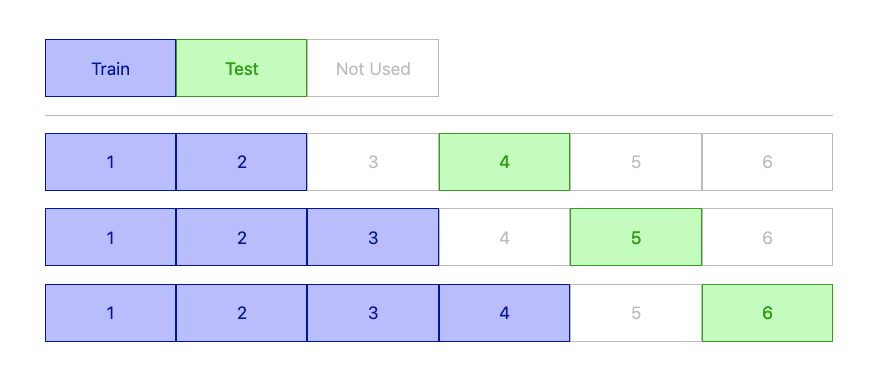

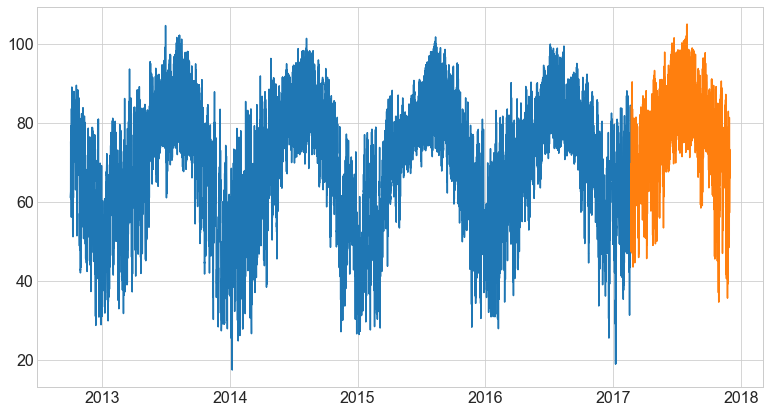

In [5]:
# Percentage-Based
train_size = .85
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

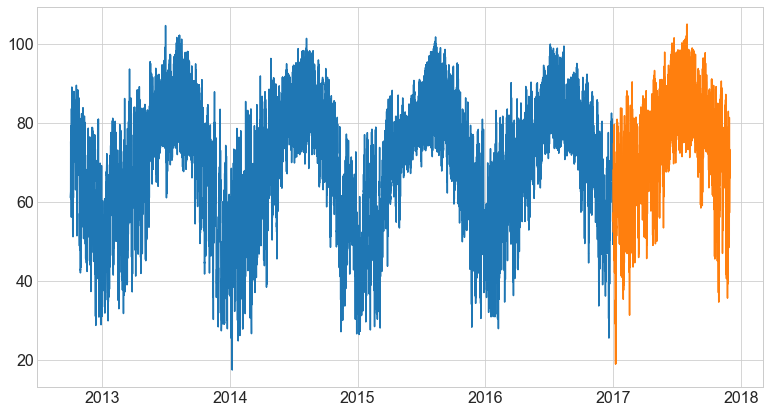

In [6]:
# Human-Based
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

## Visualizations

In [7]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

1 Blow off the time series

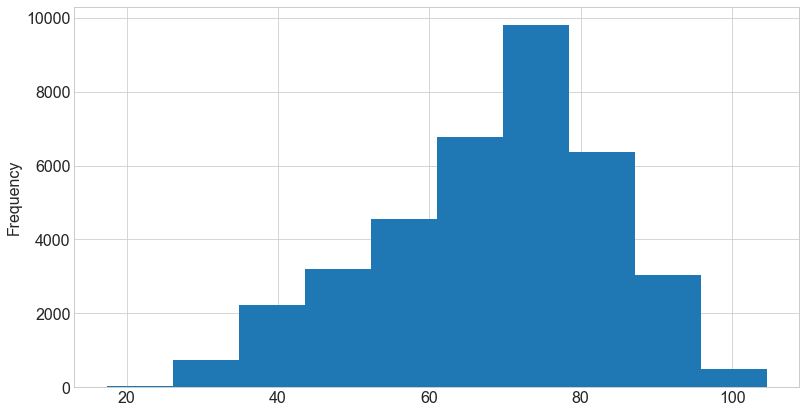

In [8]:
train.temp.plot.hist()

2 y over time

In [9]:
train["month"] = train.index.month
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

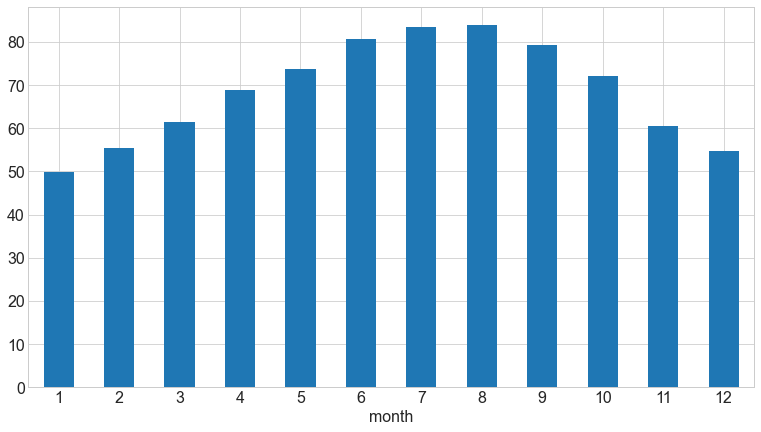

In [10]:
train.groupby("month").temp.mean().plot.bar()
plt.xticks(rotation=0)

In [11]:
train["weekday"] = train.index.day_name()
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

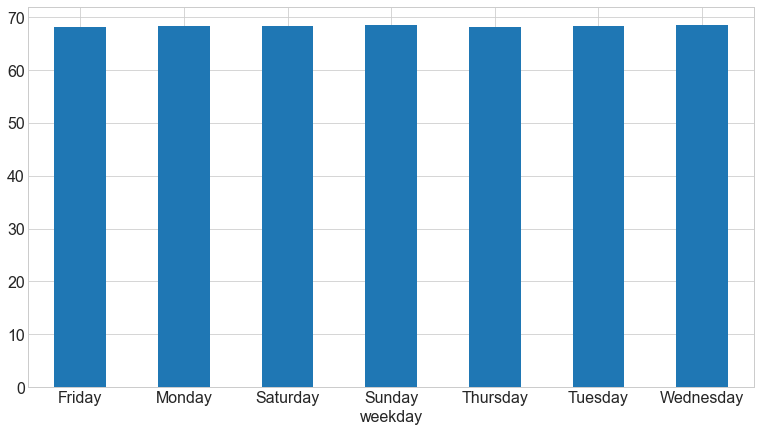

In [12]:
train.groupby("weekday").temp.mean().plot.bar()
plt.xticks(rotation=0)

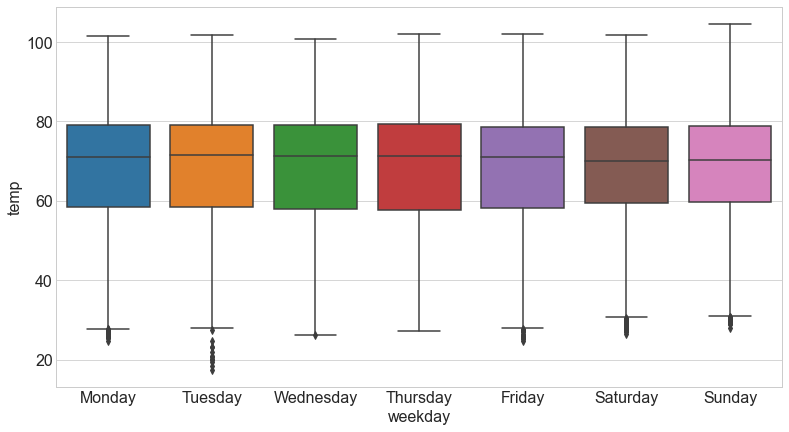

In [13]:
import seaborn as sns

sns.boxplot(data=train, y="temp", x="weekday")

In [14]:
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

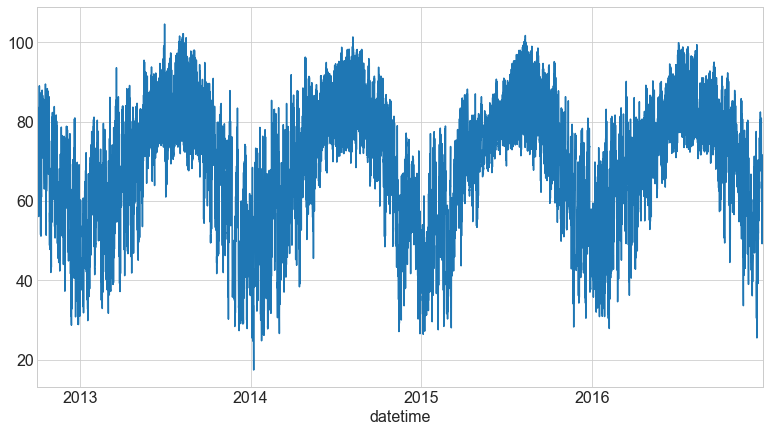

In [15]:
y.plot()

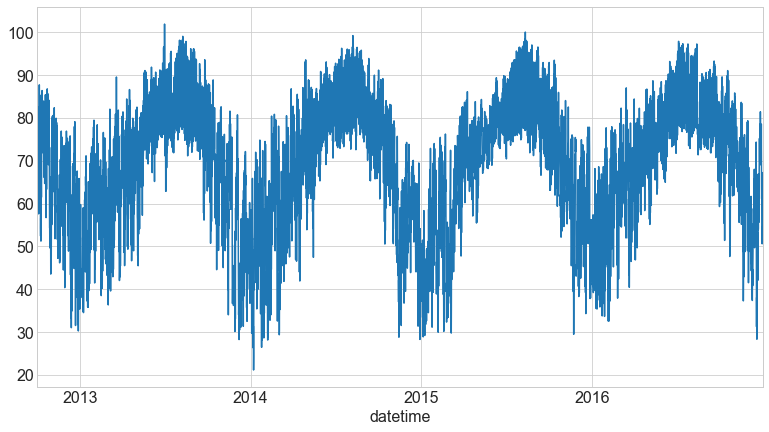

In [16]:
y.resample("6H").mean().plot()

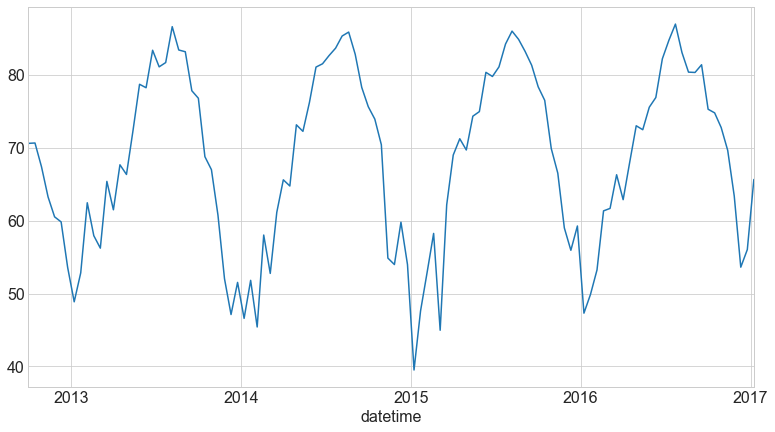

In [17]:
y.resample("2W").mean().plot()

3 y averaged over various periods over time

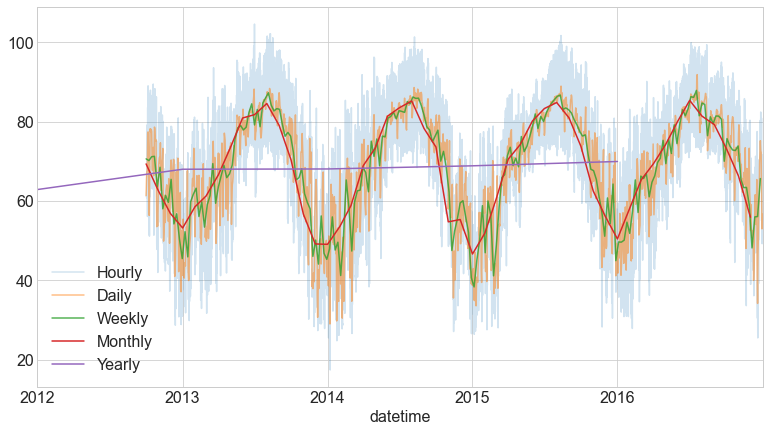

In [18]:
y.plot(alpha=.2, label="Hourly")
y.resample("D").mean().plot(alpha=.5, label="Daily")
y.resample("W").mean().plot(alpha=.8, label="Weekly")
y.resample("M").mean().plot(label="Monthly")
y.resample("Y").mean().plot(label="Yearly")
plt.legend()

4 y.diff() over time

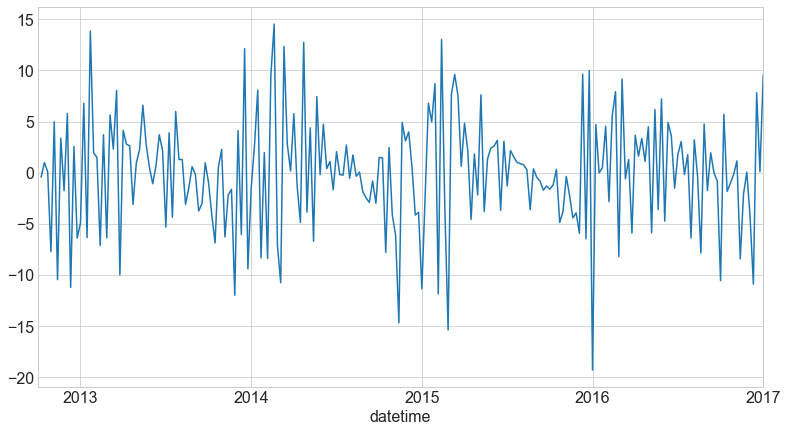

In [19]:
y.resample("W").mean().diff().plot()

> **Not a clear difference in week over week differences**

> **Check y axis units!**

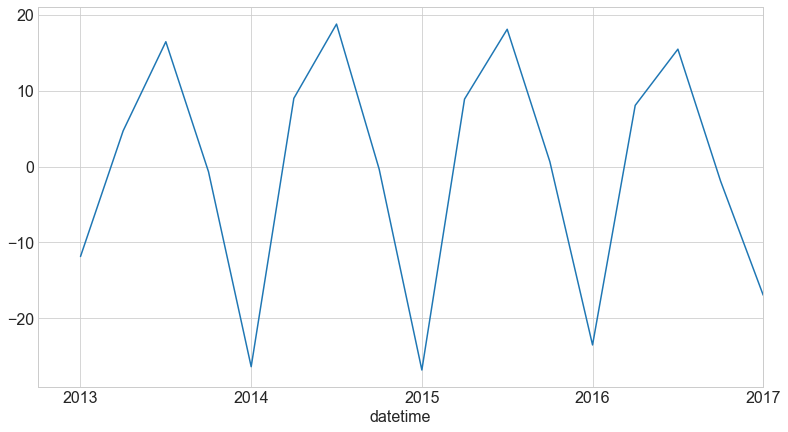

In [20]:
y.resample("3M").mean().diff().plot()

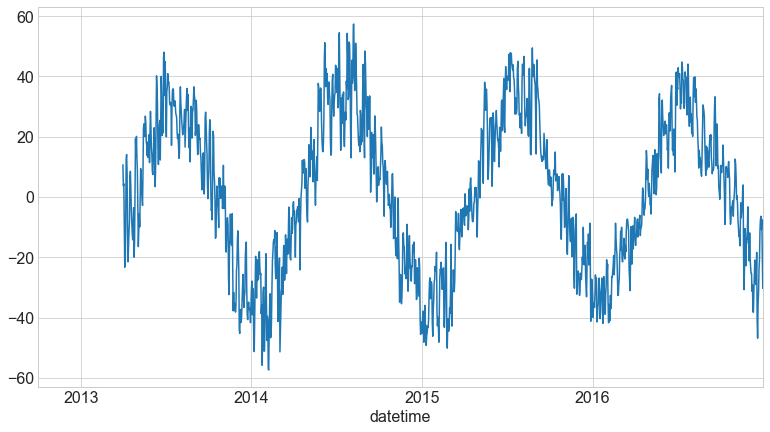

In [21]:
y.resample("D").mean().diff(182).plot()

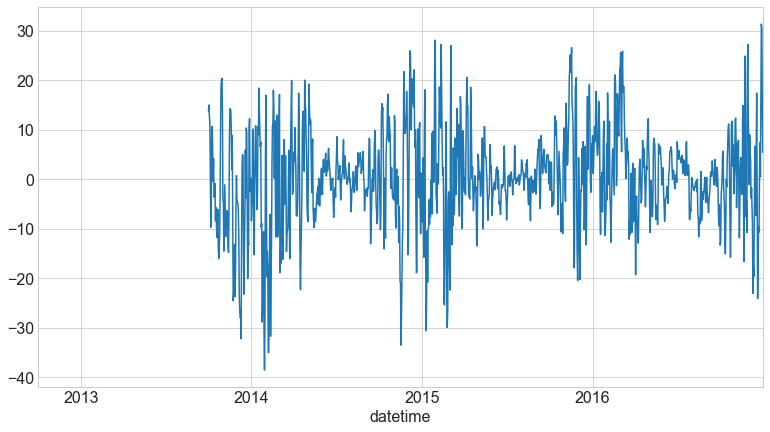

In [22]:
y.resample("D").mean().diff(365).plot()

> **Temperature fluctuates more in the winter than in the summer.**

[Text(0.5, 1.0, 'Temperature Over Time')]

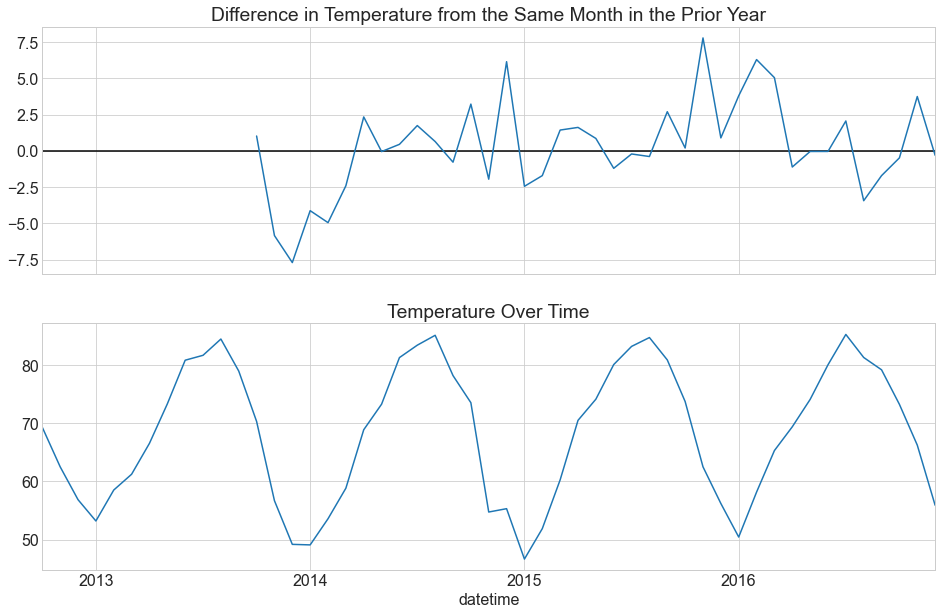

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10))

ax = y.resample("M").mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim())
ax1.set(title="Difference in Temperature from the Same Month in the Prior Year")

y.resample("M").mean().plot(ax=ax2)
ax2.set(title="Temperature Over Time")

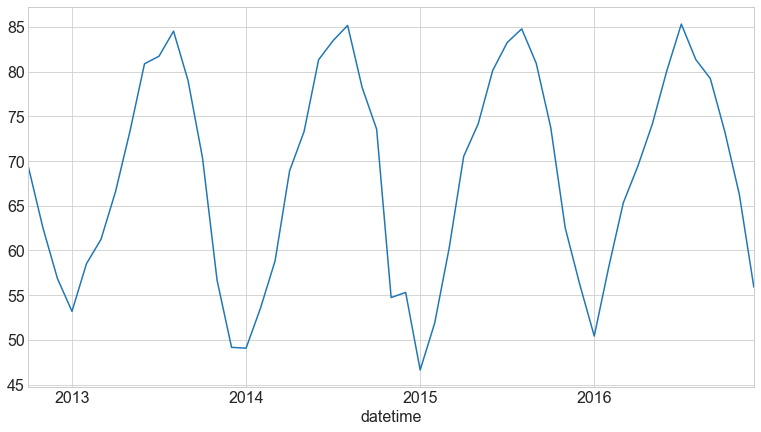

In [24]:
y.resample("M").mean().plot()

5 Seasonal Plot

- xaxis: month
- yaxis: year
- line color: year

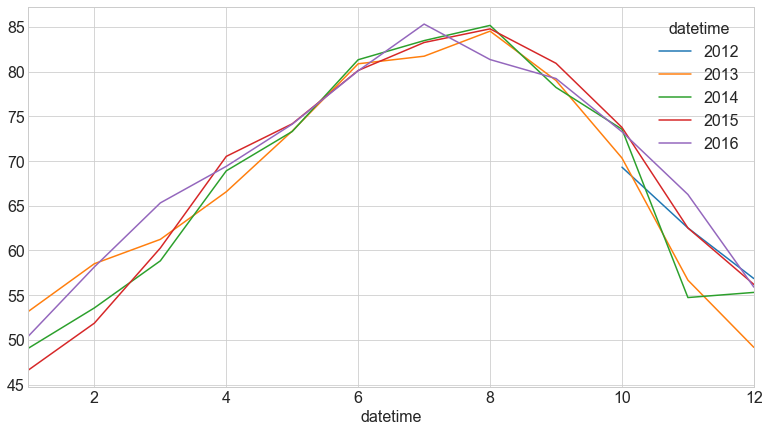

In [25]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

> **Again, we can see here that there is more variance in temp in the winter months than summer months.**

6 Seasonal Subseries Plot

In [26]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


7 Lag Plot

[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

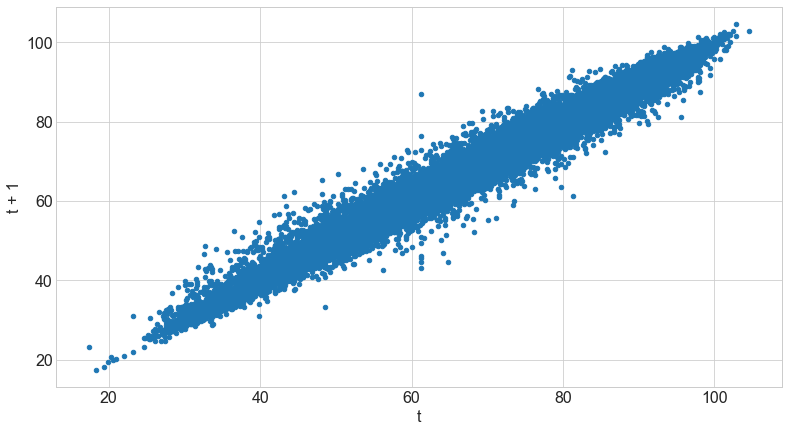

In [27]:
train["y(t + 1)"] = train.temp.shift(-1)
ax = train.plot.scatter(x="temp", y="y(t + 1)")
ax.set(xlabel="t", ylabel="t + 1")

> **Next point in time as a function of the previous point in time**

,this_week,the_next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2016-12-04,59.062094,48.163625
2016-12-11,48.163625,55.979132
2016-12-18,55.979132,56.073143


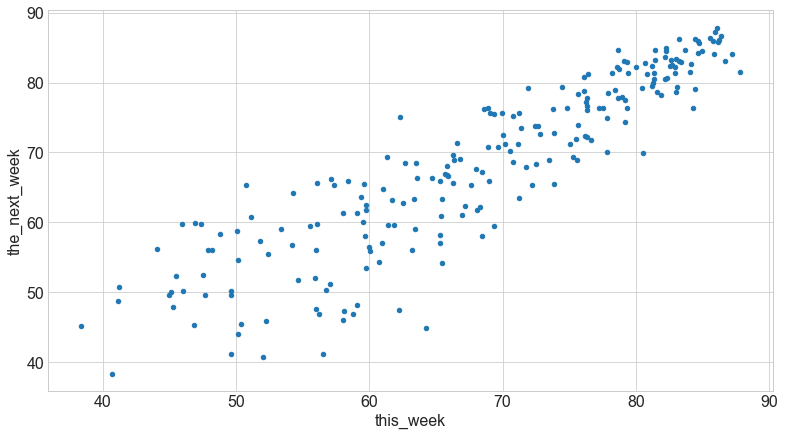

In [28]:
weekly = pd.DataFrame(train.resample("W").temp.mean())
weekly["the_next_week"] = weekly.temp.shift(-1)
weekly.rename(columns={"temp": "this_week"}, inplace=True)
weekly.plot.scatter(x="this_week", y="the_next_week")
weekly

,this_week,8_weeks_out
datetime,,
2012-10-07,70.595201,59.638196
2012-10-14,70.152821,65.431679
2012-10-21,71.138375,54.209911
2012-10-28,71.230464,56.765589
2012-11-04,63.510554,50.376741
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


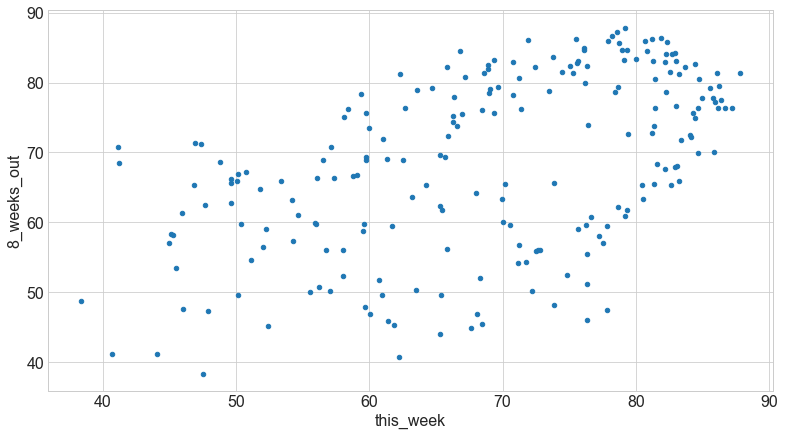

In [29]:
weekly = pd.DataFrame(train.resample("W").temp.mean())
weekly["8_weeks_out"] = weekly.temp.shift(-8)
weekly.rename(columns={"temp": "this_week"}, inplace=True)
weekly.plot.scatter(x="this_week", y="8_weeks_out")
weekly

,this_week,half_a_year_later
datetime,,
2012-10-07,70.595201,63.558611
2012-10-14,70.152821,66.345532
2012-10-21,71.138375,68.965502
2012-10-28,71.230464,65.862071
2012-11-04,63.510554,66.797107
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


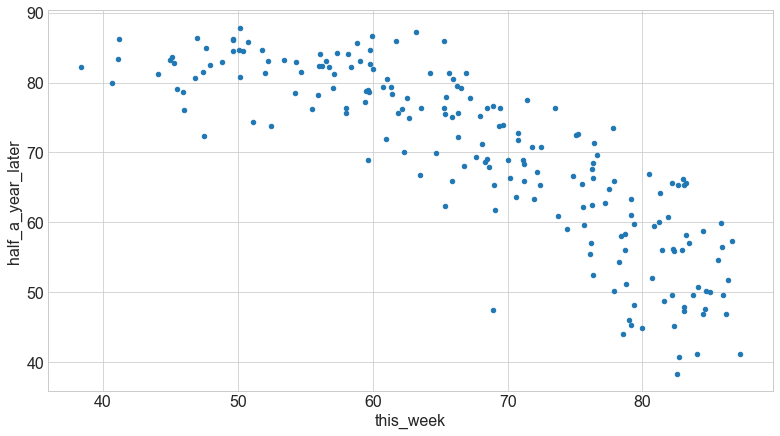

In [30]:
weekly = pd.DataFrame(train.resample("W").temp.mean())
weekly["half_a_year_later"] = weekly.temp.shift(-26)
weekly.rename(columns={"temp": "this_week"}, inplace=True)
weekly.plot.scatter(x="this_week", y="half_a_year_later")
weekly

> **These are called lagplots; use the pandas function (below) as opposed to manually generating a viz (above)**

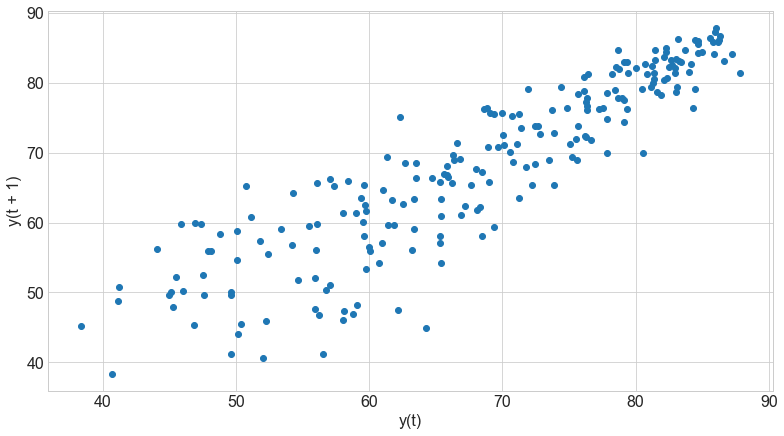

In [31]:
pd.plotting.lag_plot(train.temp.resample("W").mean(), lag=1)

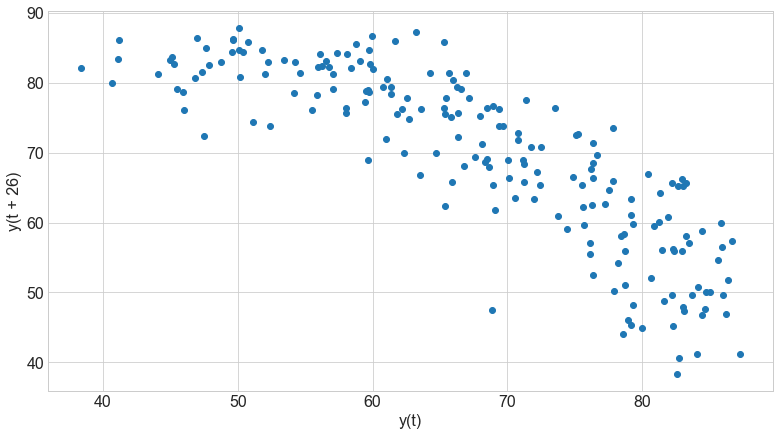

In [32]:
pd.plotting.lag_plot(train.temp.resample("W").mean(), lag=26)

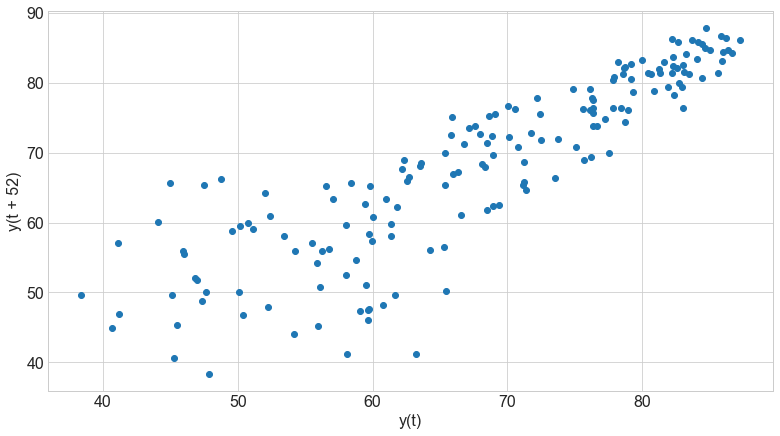

In [33]:
pd.plotting.lag_plot(train.temp.resample("W").mean(), lag=52)

> Smaller lag = stronger positive corr

> Increase lag = less corr

> Larger lag = strong negative corr

> See better explanation below

8 Autocorrelation Plot

- What is the pearson's r as a function of the lag time?
- autocorrelation: a series correlation with itself (as a function of the difference in time that we are observing)
- can help identify seasonality; here we have annual temp data so 52 week seasonality is evident

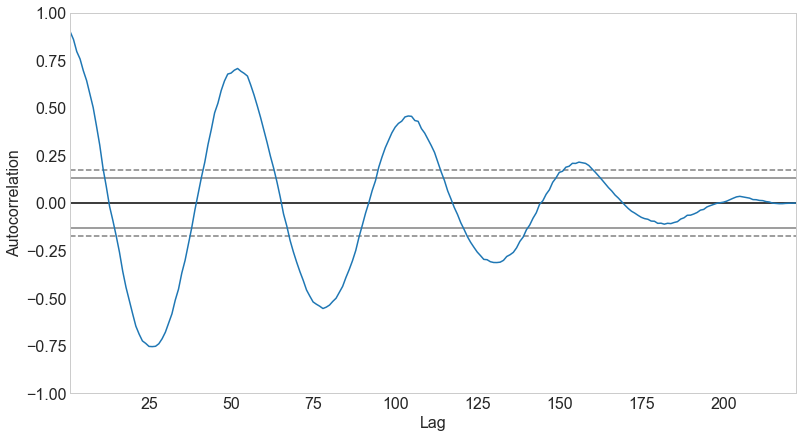

In [34]:
pd.plotting.autocorrelation_plot(train.temp.resample("W").mean())

9 Seasonal Decomposition

In [35]:
import numpy as np

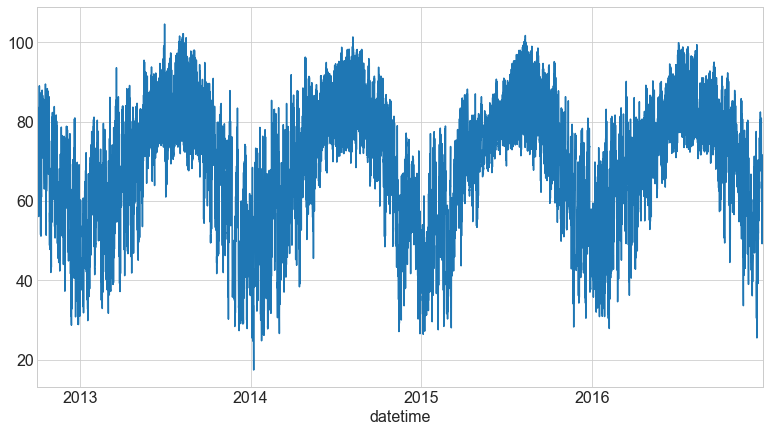

In [36]:
train.temp.plot()

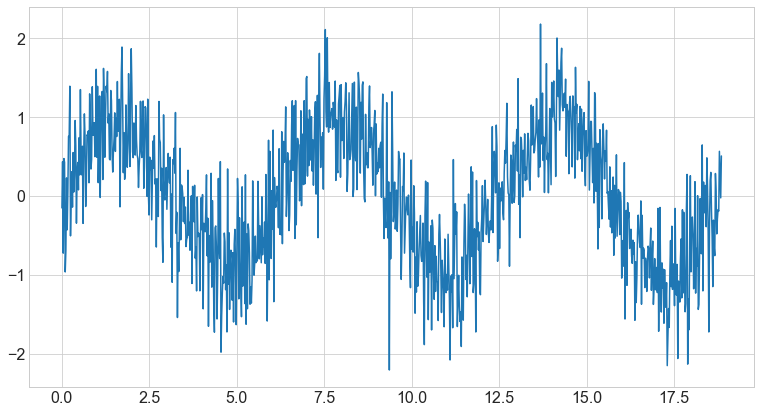

In [37]:
# synthetic
x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x) + np.random.normal(0, .5, 1000)

plt.plot(x, y)

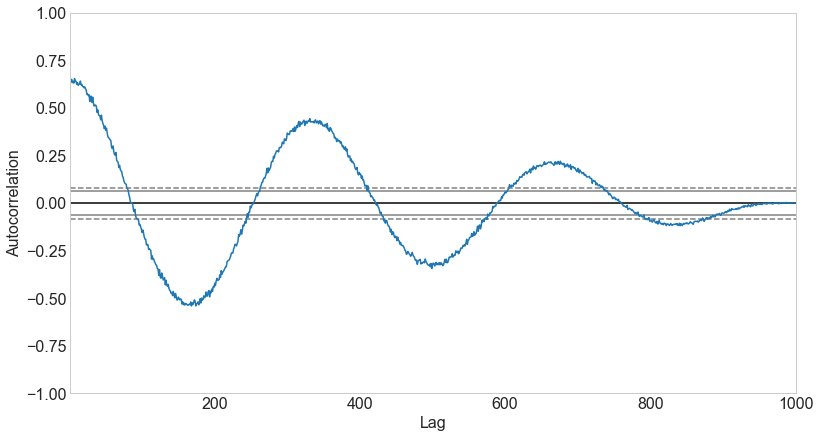

In [38]:
pd.plotting.autocorrelation_plot(y)

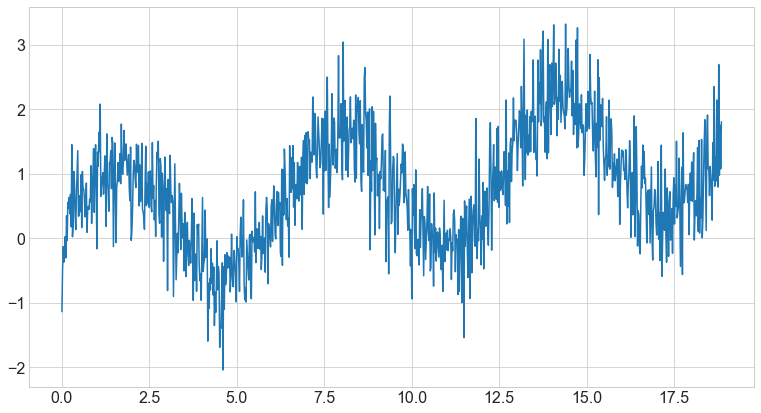

In [39]:
# synthetic
x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x) + np.random.normal(0, .5, 1000) + np.linspace(0, 1.5, 1000)

plt.plot(x, y)

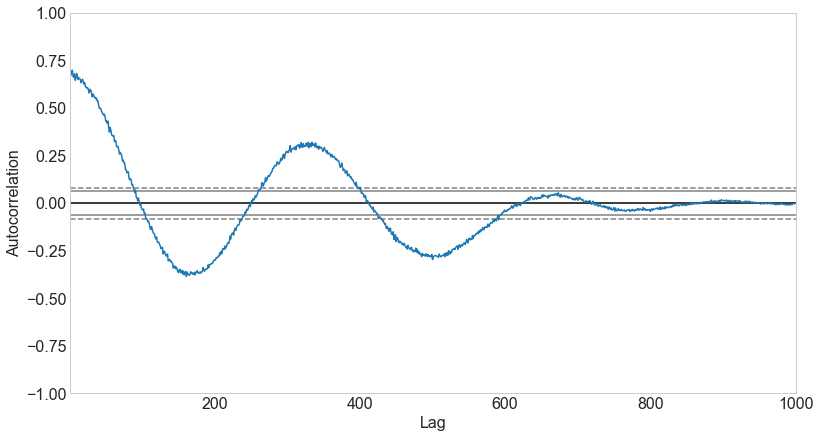

In [40]:
pd.plotting.autocorrelation_plot(y)

10 Area Plots
- can we visualize categories over time?

In [41]:
train.drop(columns="y(t + 1)", inplace=True)

In [42]:
train = train.resample("D").mean()

In [43]:
train["temp_bin"] = pd.qcut(train.temp, 4, labels=["cold", "cool", "warm", "hot"])

In [44]:
train.groupby("temp_bin").mean()

,temp,month
temp_bin,,
cold,49.381699,5.902314
cool,65.200219,6.685567
warm,75.447977,7.118557
hot,83.449087,7.448454


In [45]:
(train.groupby("temp_bin")
 .resample("M")
 .size()
 .unstack(0))

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,6.0,9.0,16.0,NaN
2012-11-30,10.0,16.0,4.0,NaN
2012-12-31,16.0,14.0,1.0,NaN
2013-01-31,24.0,5.0,2.0,NaN
2013-02-28,17.0,11.0,0.0,NaN
2013-03-31,11.0,16.0,4.0,NaN
2013-04-30,7.0,14.0,9.0,NaN
2013-05-31,1.0,8.0,16.0,6.0
2013-06-30,0.0,0.0,12.0,18.0


## `strftime`

[Cheatsheet](https://zach.lol/strftime.html) or `man strftime`

In [46]:
df.head(5).index.strftime('The date is %B %d, %Y and the time is %I:%M %p')

Index(['The date is October 01, 2012 and the time is 01:00 PM',
       'The date is October 01, 2012 and the time is 02:00 PM',
       'The date is October 01, 2012 and the time is 03:00 PM',
       'The date is October 01, 2012 and the time is 04:00 PM',
       'The date is October 01, 2012 and the time is 05:00 PM'],
      dtype='object')

## Matplotlib Dates

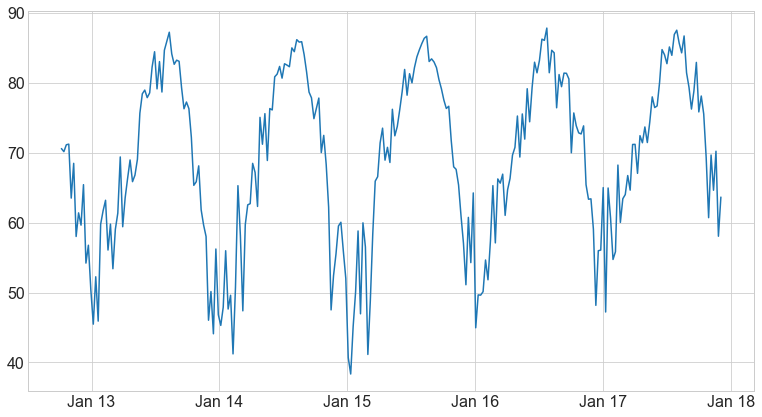

In [47]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = df.temp.resample('W').mean()

ax.plot(weekly.index, weekly)
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

Q: How do we get monday to show up first? How to we order months properly?<br>
A: Prepend the number, e.g. 0-sunday, 1-monday; then they sort alphabetically and logically